In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, SimpleRNN,Dropout,BatchNormalization
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential

from keras.optimizers import Adam

# For evaluation
from sklearn.metrics import mean_squared_error


In [5]:

train_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_set = train_data['Open'].values.reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)


X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])  # last 60
    y_train.append(training_set_scaled[i, 0])       # next value

X_train = np.array(X_train)
y_train = np.array(y_train)


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [6]:
model = Sequential()


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))  # Reduced dropout


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(SimpleRNN(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))


model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dropout(0.1))


model.add(Dense(units=1))


optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse')

model.summary()

c:\Users\anurag anil wadikar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,057 (113.50 KB)

 Trainable params: 29,057 (113.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.4154
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1534
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1420
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.1241
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0966
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1035
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0727
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0565
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0545
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0494
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0448
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0391
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0343
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0295
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - lo

In [9]:

test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data['Open'].values.reshape(-1, 1)


total_data = pd.concat((train_data['Open'], test_data['Open']), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

X_test = []

for i in range(60, 60 + len(test_data)):
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


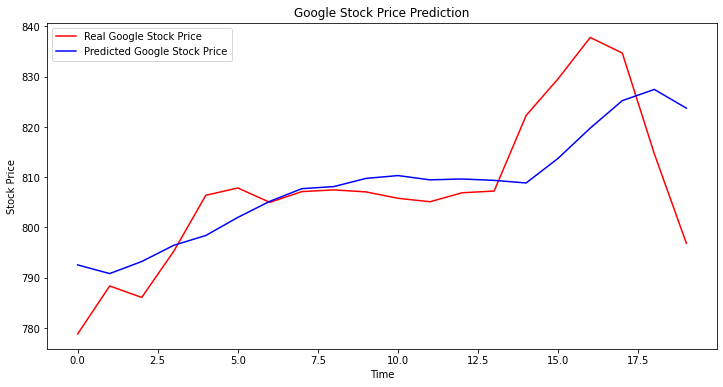

In [10]:

predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


plt.figure(figsize=(12, 6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [11]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 106.92173713299803
Root Mean Squared Error: 10.340296762327377
